# wMed flood Stage 2 : Added background potential energy (BPE) by inflow

## </span>(wMed level stays at Sicily sill level, eMed fills up)</span>


We consider the western and eastern Mediterranean basins (wMed and eMed) to be composed of 1-meter thick layers from bottom towards the surface.

Atlantic waters enter wMed through Gibraltar sill, replacing mixed wMed brines. An equivalent volume of wMed brines are transferred to the eMed.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math

## Upload data files here

In [47]:
Discharge = np.loadtxt(fname="Discharge.txt")  # Daily discharge (From Script 1)
Hypsometry_wMed = np.loadtxt(fname="Hypsometry_wMed_CalcBPE.txt")  # Reconstructed wMed hypsometry

## Setting parameters

In [48]:
rho_SW = 1027 # Sea-water density [kg m^-3]
g = 9.81      # Acceleration due to gravity [m s^-2]

Depth      = Hypsometry_wMed[:,0]  # Text file column 1 gives basin depth
DepthList  = Depth.tolist()

Area       = (Hypsometry_wMed[:,1])*10**12  # Text file column 2 gives area with depth
Vol        = (Hypsometry_wMed[:,3])*10**12  # Text file column 2 gives volume with depth
SLArray    = (Hypsometry_wMed[:,0])
VolList   = Vol.tolist()
Vol_Sicily = Vol[426]  # Sicily sill level set to 426 m, as in the end of day 386, basin fills up to this level. 
                       # For simplicity, we consider this to be stage 1 termination (As we compute daily basin evolution)
# Arrays created for the purpose of plotting
time       = []
BPE_sum    = []
lower_BPE      = []
AddedLayer_bot = []

<img src="https://www.dropbox.com/s/bjqvd1nat3iwr30/BPE_Calc_stage2.jpg?raw=1" width="749.7" height="379.4">

### Calculating added BPE (stage 2):

In following sections, added BPE per day during the stage 2 will be calculated, using similar arguments as in stage 1.

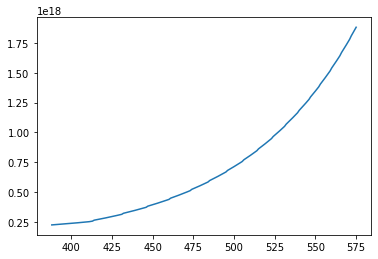

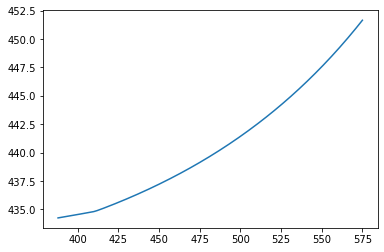

In [49]:
t = 387 # Beginning of stage 2

while t<575:
    
    Dis_daily = Discharge[t+1]*3600*24   # Daily discharge [m^3 day^-1]
    empty_Volume = Vol_Sicily + Dis_daily  # Gives the volume above existing wMed water mass, after Atlantic waters replaced wMed by daily discharge
                                           
    V_atClosestCell = Vol[Vol<empty_Volume].max()  # Gives the volume at the bottom of closest upper layer above wMed brine-Atlantic inflow water interface

    V_index = VolList.index(V_atClosestCell)  # Gives the depth to the closest upper layer bottom

    Area_atVindex  = Area[V_index]  # Gives the area at the closest upper layer bottom
    
    AddedSW_bottom = V_index
    SL_Sicily      = 426           # Sicily sill level [m]

    delta_V = empty_Volume - V_atClosestCell  # Gives the difference between true volume above wMed brine-Atlantic inflow water interface and V_atClosestCell

    delta_H = delta_V/Area_atVindex  

    NewSW_bottom = AddedSW_bottom+delta_H  # Correct depth to the added Atlantic water layer bottom

    # Set arrays to calculate added BPE, see below
    y = []
    p = []
    Product_VolumeHt = []

    for i,j in zip(SLArray,Area):
        
        if i<AddedSW_bottom and i>=SL_Sicily:
            
            y.append(i)
            p.append(j)
            
            for ii,jj in zip(y,p):
                
                product = (NewSW_bottom-ii+0.5)*jj  
                
            Product_VolumeHt.append(product) 
      
    # Upper boundary of the water mass fixed at Sicily sill level.
    # Therefore, total BPE is the sum of BPE_completeCells and BPE_bottom.
    
    BPE_completeCells = np.sum(Product_VolumeHt)*g*rho_SW
    #print(BPE_completeCells)
    
    BPE_bottom = Area_atVindex*rho_SW*g*0.5*delta_H**2
    #print(BPE_bottom)
    
    BPETotal   = BPE_completeCells + BPE_bottom
    #print(BPETotal)
    
    t=t+1
    
    time.append(t)
    BPE_sum.append(BPETotal)
    AddedLayer_bot.append(NewSW_bottom)
    lower_BPE.append(BPE_bottom)
    
plt.figure()
plt.plot(time,BPE_sum)
plt.figure()
plt.plot(time,AddedLayer_bot)

np.savetxt("wMed_Stage2_inflowBottom.txt", np.array(AddedLayer_bot), fmt="%s")
np.savetxt("wMed_added_BPE_Stage2.txt", np.array(BPE_sum), fmt="%s")
#np.savetxt("BPELowerS2.txt", np.array(lower_BPE), fmt="%s")
